*Pattern Recognition (spring99)*

*HW8:Q- DBSCAN*

prepared by: sajjad pakdaman savoji


In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [2]:
from sklearn.cluster import DBSCAN

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)


    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

In [3]:
d_tra = pd.read_csv('./data/ToyDataSet.csv')

In [5]:
d_tra = np.array(d_tra)

# use sklearn Kmeans

In [6]:
clt = KMeans(n_clusters=10)
clt.fit(d_tra)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
pl_tra = clt.predict(d_tra)

Text(0, 0.5, 'y')

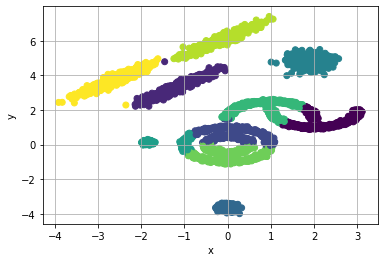

In [12]:
plt.scatter(d_tra[:, 0], d_tra[:, 1], c=pl_tra)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

## DBSCAN

In [29]:
clt = DBSCAN(eps=0.2, min_samples=30)
clt.fit(d_tra)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=30, n_jobs=None, p=None)

In [30]:
pl_tra = clt.labels_

Text(0, 0.5, 'y')

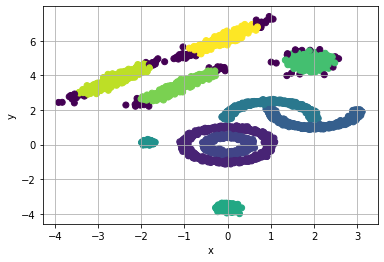

In [31]:
plt.scatter(d_tra[:, 0], d_tra[:, 1], c=pl_tra)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')